# SQL: II

**GOALS**:

- Review basic queries from last session
- Work with NULL values
- Search for string values
- Investigate different types of JOIN statements
- Aggregate with Joins


In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from sqlalchemy import create_engine

In [17]:
#create engine/connection
engine = create_engine('sqlite:///SQL_SAFI.sqlite')

In [18]:
sql = '''
SELECT *
FROM Crops;
'''

In [19]:
pd.read_sql_query(sql, engine).head()

,Id,plot_Id,crop_Id,D05_times,D_curr_crop,D_repeat_times_count
0,1,1,1,1,maize,1
1,1,2,1,1,maize,1
2,2,1,1,1,maize,1
3,2,2,1,1,tomatoes,1
4,2,3,1,1,vegetable,1


### PROBLEM

- Write a SQL query to count the crops in the Crops table.
- Create a bar plot of the top ten crops produced by count.

In [20]:
#HINTS: USE COUNT, GROUP BY, ORDER BY, and LIMIT

In [23]:
sql = '''
SELECT COUNT(c.D_curr_crop) AS n, c.D_curr_crop as crop_type
FROM Crops AS c
GROUP BY crop_type
ORDER BY n DESC 
LIMIT 10;
'''
df = pd.read_sql_query(sql, engine)

<BarContainer object of 10 artists>

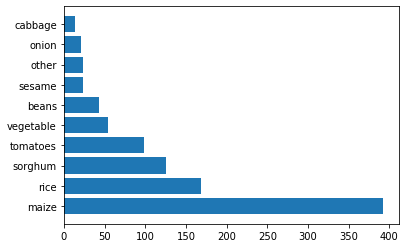

In [25]:
#barplot
plt.barh(df['crop_type'], df['n'])

### Missing Data

In [26]:
engine = create_engine('sqlite:///survey.db')

In [27]:
sql = '''
SELECT *
FROM Visited;

'''

In [29]:
pd.read_sql_query(sql, engine)

,id,site,dated
0,619,DR-1,1927-02-08
1,622,DR-1,1927-02-10
2,734,DR-3,1930-01-07
3,735,DR-3,1930-01-12
4,751,DR-3,1930-02-26
5,752,DR-3,None
6,837,MSK-4,1932-01-14
7,844,DR-1,1932-03-22


In [30]:
df = pd.read_sql_query(sql, engine)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 3 columns):
id       8 non-null object
site     8 non-null object
dated    7 non-null object
dtypes: object(3)
memory usage: 320.0+ bytes


In [32]:
#find missing values
sql = '''
SELECT *
FROM Visited
WHERE dated IS NULL;

'''
pd.read_sql_query(sql, engine)

,id,site,dated
0,752,DR-3,None


In [33]:
#where not missing
sql = '''
SELECT * 
FROM Visited
WHERE dated IS NOT NULL;
'''
pd.read_sql_query(sql, engine)

,id,site,dated
0,619,DR-1,1927-02-08
1,622,DR-1,1927-02-10
2,734,DR-3,1930-01-07
3,735,DR-3,1930-01-12
4,751,DR-3,1930-02-26
5,837,MSK-4,1932-01-14
6,844,DR-1,1932-03-22


**PROBLEMS**

1. Write a query that sorts the records in Visited by date, omitting entries for which the date is not known (i.e., is null).


In [34]:
#solution
sql = '''
SELECT *
FROM Visited
WHERE dated IS NOT NULL
ORDER BY dated
'''
pd.read_sql_query(sql, engine)

,id,site,dated
0,619,DR-1,1927-02-08
1,622,DR-1,1927-02-10
2,734,DR-3,1930-01-07
3,735,DR-3,1930-01-12
4,751,DR-3,1930-02-26
5,837,MSK-4,1932-01-14
6,844,DR-1,1932-03-22


### Restaurant Database

In [35]:
engine = create_engine('postgres://DSI8:p3c1341f0f241ef04befd0f0b3acc0365eb30839b9408f9a9b3278d96966f34b8@ec2-34-202-213-35.compute-1.amazonaws.com:5432/dc5rooirs71hh0')

In [36]:
engine.table_names()

['restaurants',
 'foods',
 'schema_migrations',
 'categories_foods',
 'categories',
 'ar_internal_metadata']

In [37]:
sql = """
SELECT *
FROM foods
"""

df = pd.read_sql_query(sql, engine)
df.head()

,id,name,restaurant_id,calories,fat,carbs,created_at,updated_at
0,26,Blue Raspberry Slushee,1.0,370.0,0.0,91.0,2017-04-17 19:43:29.627441,2017-04-17 19:43:29.627441
1,27,Blue Raspberry Slushee,1.0,570.0,0.0,142.0,2017-04-17 19:43:29.634462,2017-04-17 19:43:29.634462
2,28,Blue Raspberry Slushee,1.0,740.0,0.0,182.0,2017-04-17 19:43:29.641432,2017-04-17 19:43:29.641432
3,29,Breaded Onion Rings (Large),1.0,480.0,27.0,62.0,2017-04-17 19:43:29.653546,2017-04-17 19:43:29.653546
4,30,Breaded Onion Rings (Regular),1.0,350.0,16.0,45.0,2017-04-17 19:43:29.659697,2017-04-17 19:43:29.659697


In [42]:
#ALIASING 
sql = '''
SELECT f.name, f.calories
FROM foods AS f;
'''

In [43]:
df = pd.read_sql_query(sql, engine)
df.head()

,name,calories
0,Blue Raspberry Slushee,370.0
1,Blue Raspberry Slushee,570.0
2,Blue Raspberry Slushee,740.0
3,Breaded Onion Rings (Large),480.0
4,Breaded Onion Rings (Regular),350.0


In [44]:
#using DISTINCT
sql = '''
SELECT DISTINCT f.name as food
FROM foods AS f;
'''

In [45]:
df = pd.read_sql_query(sql, engine)
df.head()

,food
0,House Salad with TangyTomato Dressing
1,"Cranberry Juice, 10 fl oz"
2,M&Ms Chocolate Candies
3,None
4,Harvest Salad V (Caf & Combo)


##### ORDER BY

In [46]:
#name and calories from most calories to least
sql = '''
SELECT f.name as food, f.calories
FROM foods AS f
ORDER BY f.calories DESC;
'''

In [47]:
df = pd.read_sql_query(sql, engine)
df.head()

,food,calories
0,Iced Coffee Black,NaN
1,Iced Coffee Black,NaN
2,20 piece & 10 biscuit box serves 9-11),8820.0
3,12 piece & 6 biscuit box (serves 5-7),5300.0
4,Country Large Oblong VG (whole),4220.0


In [48]:
#restaurants in alphabetical order
sql = '''
SELECT r.name
FROM restaurants as r
ORDER BY r.name;
'''

In [49]:
df = pd.read_sql_query(sql, engine)
df.head()

,name
0,Applebee's
1,Arby's
2,Atlanta Bread Company
3,A&W Restaurants
4,Bojangle's Famous Chicken 'n Biscuits


In [55]:
#id, name, and calories from foods
#order by id small to large, then 
#calories big to small
sql = '''
SELECT f.restaurant_id AS rid, f.name, f.calories
FROM foods AS f
ORDER BY rid ASC, f.calories DESC
LIMIT 20;
'''

In [56]:
df = pd.read_sql_query(sql, engine)
df.head()

,rid,name,calories
0,1,A&W Root Beer,1760
1,1,Reeses Peanut Butter Fudge Blendrrr,1360
2,1,Cheese Curds (Large),1140
3,1,Chocolate Fudge Blendrrr,1010
4,1,Orange Freeze (medium),970


In [ ]:
#remember LIMIT to limit output
sql = '''

'''

In [ ]:
df = pd.read_sql_query(sql, engine)
df.head()

##### LIKE

In [63]:
#foods that start with Whop
sql = """
SELECT * FROM foods
WHERE foods.name LIKE '%Whop%'
"""
#pd.read_sql_query(sql, engine)

In [64]:
# df = pd.read_sql_query(sql, engine)
# df.head()

In [65]:
from sqlalchemy import text

In [66]:
#the wildcard needs to be handled
df = pd.read_sql_query(text(sql), engine)
df.head()

,id,name,restaurant_id,calories,fat,carbs,created_at,updated_at
0,807,Double Whopper Sandwich,7,900,57,51,2017-04-17 19:43:51.944372,2017-10-23 22:59:07.697986
1,808,Double Whopper Sandwich w/o Mayo,7,740,39,51,2017-04-17 19:43:51.950270,2017-10-23 22:59:07.704809
2,809,Double Whopper Sandwich with Cheese,7,990,65,53,2017-04-17 19:43:51.956767,2017-10-23 22:59:07.712046
3,810,Double Whopper Sandwich with Cheese w/o Mayo,7,830,47,53,2017-04-17 19:43:51.962417,2017-10-23 22:59:07.720143
4,842,Mustard Whopper Sandwich,7,530,23,52,2017-04-17 19:43:52.165888,2017-10-23 22:59:08.118166


In [69]:
#case sensitive or not
sql = """
SELECT * FROM foods
WHERE foods.name ILIKE '%whopper%'
"""

In [70]:
df = pd.read_sql_query(text(sql), engine)
df.head()

,id,name,restaurant_id,calories,fat,carbs,created_at,updated_at
0,807,Double Whopper Sandwich,7,900,57,51,2017-04-17 19:43:51.944372,2017-10-23 22:59:07.697986
1,808,Double Whopper Sandwich w/o Mayo,7,740,39,51,2017-04-17 19:43:51.950270,2017-10-23 22:59:07.704809
2,809,Double Whopper Sandwich with Cheese,7,990,65,53,2017-04-17 19:43:51.956767,2017-10-23 22:59:07.712046
3,810,Double Whopper Sandwich with Cheese w/o Mayo,7,830,47,53,2017-04-17 19:43:51.962417,2017-10-23 22:59:07.720143
4,842,Mustard Whopper Sandwich,7,530,23,52,2017-04-17 19:43:52.165888,2017-10-23 22:59:08.118166


In [71]:
#where things are not like whoppers
sql = '''
SELECT * FROM foods
WHERE foods.name NOT LIKE '%Whopper%'
'''

In [72]:
pd.read_sql_query(text(sql), engine).head()

,id,name,restaurant_id,calories,fat,carbs,created_at,updated_at
0,26,Blue Raspberry Slushee,1.0,370.0,0.0,91.0,2017-04-17 19:43:29.627441,2017-04-17 19:43:29.627441
1,27,Blue Raspberry Slushee,1.0,570.0,0.0,142.0,2017-04-17 19:43:29.634462,2017-04-17 19:43:29.634462
2,28,Blue Raspberry Slushee,1.0,740.0,0.0,182.0,2017-04-17 19:43:29.641432,2017-04-17 19:43:29.641432
3,29,Breaded Onion Rings (Large),1.0,480.0,27.0,62.0,2017-04-17 19:43:29.653546,2017-04-17 19:43:29.653546
4,30,Breaded Onion Rings (Regular),1.0,350.0,16.0,45.0,2017-04-17 19:43:29.659697,2017-04-17 19:43:29.659697


### JOINS

<center>
    <img src = 'http://swcarpentry.github.io/sql-novice-survey/fig/sql-join-structure.svg' width = 40% />
    </center>

In [73]:
engine = create_engine('sqlite:///survey.db')

In [74]:
sql = '''
SELECT *
FROM Visited;
'''

In [75]:
pd.read_sql_query(sql, engine)

,id,site,dated
0,619,DR-1,1927-02-08
1,622,DR-1,1927-02-10
2,734,DR-3,1930-01-07
3,735,DR-3,1930-01-12
4,751,DR-3,1930-02-26
5,752,DR-3,None
6,837,MSK-4,1932-01-14
7,844,DR-1,1932-03-22


In [76]:
pd.read_sql_query(sql, engine).shape

(8, 3)

In [77]:
sql = '''
SELECT *
FROM Site;
'''

In [78]:
pd.read_sql_query(sql, engine).head()

,name,lat,long
0,DR-1,-49.85,-128.57
1,DR-3,-47.15,-126.72
2,MSK-4,-48.87,-123.40


In [79]:
pd.read_sql_query(sql, engine).shape

(3, 3)

In [80]:
sql = '''
SELECT *
FROM Site
JOIN Visited;
'''

In [81]:
pd.read_sql_query(sql, engine).head()

,name,lat,long,id,site,dated
0,DR-1,-49.85,-128.57,619,DR-1,1927-02-08
1,DR-1,-49.85,-128.57,622,DR-1,1927-02-10
2,DR-1,-49.85,-128.57,734,DR-3,1930-01-07
3,DR-1,-49.85,-128.57,735,DR-3,1930-01-12
4,DR-1,-49.85,-128.57,751,DR-3,1930-02-26


In [82]:
pd.read_sql_query(sql, engine).shape

(24, 6)

In [83]:
#create a table with latitude, longitude, and date
sql = '''
SELECT *
FROM Site
JOIN Visited on Site.name = Visited.site;
'''

In [84]:
pd.read_sql_query(sql, engine)

,name,lat,long,id,site,dated
0,DR-1,-49.85,-128.57,619,DR-1,1927-02-08
1,DR-1,-49.85,-128.57,622,DR-1,1927-02-10
2,DR-1,-49.85,-128.57,844,DR-1,1932-03-22
3,DR-3,-47.15,-126.72,734,DR-3,1930-01-07
4,DR-3,-47.15,-126.72,735,DR-3,1930-01-12
5,DR-3,-47.15,-126.72,751,DR-3,1930-02-26
6,DR-3,-47.15,-126.72,752,DR-3,None
7,MSK-4,-48.87,-123.40,837,MSK-4,1932-01-14


In [85]:
pd.read_sql_query(sql, engine).shape

(8, 6)

In [86]:
#combining the meaningful data
sql = '''
SELECT Site.lat, Site.long, Visited.dated, Survey.quant, Survey.reading
FROM Site JOIN Visited JOIN Survey
ON Site.name = Visited.site
AND Visited.id = Survey.taken
AND Visited.dated IS NOT NULL;
'''

In [87]:
pd.read_sql_query(sql, engine)

,lat,long,dated,quant,reading
0,-49.85,-128.57,1927-02-08,rad,9.82
1,-49.85,-128.57,1927-02-08,sal,0.13
2,-49.85,-128.57,1927-02-10,rad,7.80
3,-49.85,-128.57,1927-02-10,sal,0.09
4,-47.15,-126.72,1930-01-07,rad,8.41
5,-47.15,-126.72,1930-01-07,sal,0.05
6,-47.15,-126.72,1930-01-07,temp,-21.50
7,-47.15,-126.72,1930-01-12,rad,7.22
8,-47.15,-126.72,1930-01-12,sal,0.06
9,-47.15,-126.72,1930-01-12,temp,-26.00


### PROBLEMS

1. Write a query that lists all radiation readings from the DR-1 site.
2. Write a query that lists sites visited by people named "Frank".
3. Describe in your own words what the following query produces:
```sql
SELECT Site.name 
FROM Site 
JOIN Visited ON Site.lat < -49.0 AND Site.name = Visited.site AND Visited.dated >= '1932-01-01';
```
4. Write a query that shows each site with exact location (lat, long) ordered by visited date, followed by personal name and family name of the person who visited the site and the type of measurement taken and its reading. Please avoid all null values. Tip: you should get 15 records with 8 fields.

In [88]:
engine.table_names()

['Person', 'Site', 'Survey', 'Visited']

In [95]:
#solution 1
sql = '''
SELECT *
FROM Site
JOIN Visited JOIN Survey
ON Site.name  = Visited.site
AND Visited.id = Survey.taken
WHERE Site.name = 'DR-1'
AND Survey.quant = 'rad';
'''
pd.read_sql_query(sql, engine).head(2)

,name,lat,long,id,site,dated,taken,person,quant,reading
0,DR-1,-49.85,-128.57,619,DR-1,1927-02-08,619,dyer,rad,9.82
1,DR-1,-49.85,-128.57,622,DR-1,1927-02-10,622,dyer,rad,7.80


In [99]:
#solution 2
sql = '''
SELECT DISTINCT Site.name
FROM Site JOIN Visited JOIN Survey JOIN Person
ON Site.name = Visited.site
AND Visited.id = Survey.taken
AND Survey.person = Person.id
WHERE Person.personal = 'Frank';
'''
pd.read_sql_query(sql, engine)

,name
0,DR-3


In [101]:
#solution 3
sql = '''
SELECT Site.name, Site.lat, Site.long, Person.personal, Person.family, 
Survey.quant, Survey.reading, Visited.dated
FROM Site JOIN Visited JOIN Survey JOIN Person
ON Site.name = Visited.site
AND Visited.id = Survey.taken
AND Survey.person = Person.id
AND Visited.dated IS NOT NULL
ORDER BY Visited.dated;
'''
pd.read_sql_query(sql, engine)

,name,lat,long,personal,family,quant,reading,dated
0,DR-1,-49.85,-128.57,William,Dyer,rad,9.82,1927-02-08
1,DR-1,-49.85,-128.57,William,Dyer,sal,0.13,1927-02-08
2,DR-1,-49.85,-128.57,William,Dyer,rad,7.80,1927-02-10
3,DR-1,-49.85,-128.57,William,Dyer,sal,0.09,1927-02-10
4,DR-3,-47.15,-126.72,Anderson,Lake,sal,0.05,1930-01-07
5,DR-3,-47.15,-126.72,Frank,Pabodie,rad,8.41,1930-01-07
6,DR-3,-47.15,-126.72,Frank,Pabodie,temp,-21.50,1930-01-07
7,DR-3,-47.15,-126.72,Frank,Pabodie,rad,7.22,1930-01-12
8,DR-3,-47.15,-126.72,Anderson,Lake,sal,0.10,1930-02-26
9,DR-3,-47.15,-126.72,Frank,Pabodie,rad,4.35,1930-02-26


In [ ]:
#solution 4
sql = '''

'''
pd.read_sql_query(sql, engine)

#### More JOINS

- Inner Join
- Left/Right Join
- Left/Right outer join
- Union

[Visual Tool](https://sql-joins.leopard.in.ua/)

In [102]:
engine = create_engine('postgres://DSI8:p3c1341f0f241ef04befd0f0b3acc0365eb30839b9408f9a9b3278d96966f34b8@ec2-34-202-213-35.compute-1.amazonaws.com:5432/dc5rooirs71hh0')

In [103]:
engine.table_names()

['restaurants',
 'foods',
 'schema_migrations',
 'categories_foods',
 'categories',
 'ar_internal_metadata']

In [104]:
from sqlalchemy import inspect

In [105]:
insp = inspect(engine)

In [106]:
insp.get_columns('restaurants')

[{'name': 'id',
  'type': INTEGER(),
  'nullable': False,
  'default': "nextval('restaurants_id_seq'::regclass)",
  'autoincrement': True,
  'comment': None},
 {'name': 'name',
  'type': VARCHAR(),
  'nullable': True,
  'default': None,
  'autoincrement': False,
  'comment': None},
 {'name': 'created_at',
  'type': TIMESTAMP(),
  'nullable': False,
  'default': None,
  'autoincrement': False,
  'comment': None},
 {'name': 'updated_at',
  'type': TIMESTAMP(),
  'nullable': False,
  'default': None,
  'autoincrement': False,
  'comment': None}]

**SQALCHEMY DOCS**: https://docs.sqlalchemy.org/en/13/core/reflection.html

In [107]:
#whats in the restaurants table
pd.read_sql_query('SELECT * from restaurants', engine).head()

,id,name,created_at,updated_at
0,1,A&W Restaurants,2017-04-17 19:43:26.708904,2017-04-17 19:43:26.708904
1,2,Applebee's,2017-04-17 19:43:30.306405,2017-04-17 19:43:30.306405
2,3,Arby's,2017-04-17 19:43:35.190138,2017-04-17 19:43:35.190138
3,4,Atlanta Bread Company,2017-04-17 19:43:38.028008,2017-04-17 19:43:38.028008
4,5,Bojangle's Famous Chicken 'n Biscuits,2017-04-17 19:43:42.123451,2017-04-17 19:43:42.123451


In [108]:
#whats in the foods table
pd.read_sql_query('SELECT * from foods', engine).head()

,id,name,restaurant_id,calories,fat,carbs,created_at,updated_at
0,26,Blue Raspberry Slushee,1.0,370.0,0.0,91.0,2017-04-17 19:43:29.627441,2017-04-17 19:43:29.627441
1,27,Blue Raspberry Slushee,1.0,570.0,0.0,142.0,2017-04-17 19:43:29.634462,2017-04-17 19:43:29.634462
2,28,Blue Raspberry Slushee,1.0,740.0,0.0,182.0,2017-04-17 19:43:29.641432,2017-04-17 19:43:29.641432
3,29,Breaded Onion Rings (Large),1.0,480.0,27.0,62.0,2017-04-17 19:43:29.653546,2017-04-17 19:43:29.653546
4,30,Breaded Onion Rings (Regular),1.0,350.0,16.0,45.0,2017-04-17 19:43:29.659697,2017-04-17 19:43:29.659697


In [109]:
#categories
pd.read_sql_query('SELECT * from categories', engine).head()

,id,name,created_at,updated_at
0,1,Drinks,2017-04-17 19:43:29.423043,2017-04-17 20:05:35.796750
1,2,Shakes,2017-04-17 19:43:29.484934,2017-04-17 20:05:35.803809
2,3,Sides,2017-04-17 19:43:29.648398,2017-04-17 20:05:35.809128
3,4,Desserts,2017-04-17 19:43:29.668462,2017-04-17 20:05:35.814921
4,5,Entrees,2017-04-17 19:43:29.693234,2017-04-17 20:05:35.821672


In [110]:
#categories_foods
pd.read_sql_query('SELECT * from categories_foods', engine).head()

,category_id,food_id
0,1,2
1,1,3
2,1,4
3,1,5
4,1,6


In [111]:
#names of every food item with restaurant
sql = '''
SELECT f.name, r.name AS restaurant
FROM foods AS f
INNER JOIN restaurants AS r on r.id = f.restaurant_id;
'''
pd.read_sql_query(sql, engine).head()

,name,restaurant
0,Blue Raspberry Slushee,A&W Restaurants
1,Blue Raspberry Slushee,A&W Restaurants
2,Blue Raspberry Slushee,A&W Restaurants
3,Breaded Onion Rings (Large),A&W Restaurants
4,Breaded Onion Rings (Regular),A&W Restaurants


In [113]:
#every item from Burger King
sql = '''
SELECT f.name, r.name AS restaurant
FROM foods AS f
INNER JOIN restaurants AS r on r.id = f.restaurant_id
WHERE r.name = 'Burger King';
'''
pd.read_sql_query(sql, engine).head()

,name,restaurant
0,American Original Chicken Sandwich,Burger King
1,Bacon Cheeseburger,Burger King
2,"Bacon, Egg & Cheese Biscuit",Burger King
3,Biscuits (2) & Sausage Gravy Platter,Burger King
4,Biscuit w/ Breakfast Steak (Country Fried Steak),Burger King


In [118]:
#every food item with category
sql = '''
SELECT f.name AS food, c.name as category
FROM foods AS f
INNER JOIN categories_foods AS cf ON cf.food_id = f.id
INNER JOIN categories AS c ON c.id = cf.category_id;
'''
pd.read_sql_query(sql, engine)

,food,category
0,A&W Diet Root Beer,Drinks
1,A&W Diet Root Beer,Drinks
2,A&W Diet Root Beer,Drinks
3,A&W Diet Root Beer,Drinks
4,A&W Diet Root Beer,Drinks
...,...,...
4971,Chive & Onion,Cream Cheese Spreads
4972,Plain,Cream Cheese Spreads
4973,Plain,Cream Cheese Spreads
4974,Reduced Fat Hazelnut,Cream Cheese Spreads


In [119]:
#every food item in desert category
sql = '''
SELECT f.name AS food, c.name as category
FROM foods AS f
INNER JOIN categories_foods AS cf ON cf.food_id = f.id
INNER JOIN categories AS c ON c.id = cf.category_id
WHERE c.name = 'Desserts';
'''
pd.read_sql_query(sql, engine)

,food,category
0,Caramel Sundae,Desserts
1,Chocolate Fudge Blendrrr,Desserts
2,Chocolate Fudge Blendrrr,Desserts
3,Chocolate Fudge Blendrrr,Desserts
4,Chocolate Sundae,Desserts
...,...,...
384,Sugar Cookie,Desserts
385,White Macadamia Nut Cookie,Desserts
386,Caramel Apple Empanada,Desserts
387,Cheesecake Chimichanga,Desserts


**PROBLEM**



In [ ]:
#name, restaurant and calories of the 
#top ten most caloric "Kid's Meals" (this is a category)
sql = """

"""

df = pd.read_sql_query(sql, engine)
df.head()

### Aggregation with Joins

In [120]:
#how many rows in foods table
sql = '''
SELECT COUNT(name)
FROM foods;
'''
pd.read_sql_query(sql, engine)

,count
0,4975


In [122]:
#average number of calories for each restaurant
sql = '''
SELECT r.name, AVG(f.calories)
FROM foods AS f
INNER JOIN restaurants AS r ON r.id = f.restaurant_id
GROUP BY r.name;
'''
pd.read_sql_query(sql, engine).head()

,name,avg
0,Olive Garden,570.384615
1,Dairy Queen,565.925000
2,Jack in the Box,439.685315
3,Charley's Grilled Subs,446.311111
4,Jimmy Johns,474.913043


*The non-aggregated columns must be included in your Groupby statement*

In [124]:
#id, name, average calories per restaurant
sql = '''
SELECT r.id, r.name, AVG(f.calories)
FROM foods AS f
INNER JOIN restaurants AS r ON r.id = f.restaurant_id
GROUP BY r.name, r.id;
'''
pd.read_sql_query(sql, engine).head()

,id,name,avg
0,42,Taco Bell,369.666667
1,29,KFC,274.482759
2,4,Atlanta Bread Company,429.440559
3,34,Panda Express,273.233333
4,41,Subway,295.000000


In [125]:
#name and average calories for all restaurants 
#averaging more than 700 calories per item
sql = '''
SELECT r.name, AVG(f.calories)
FROM restaurants AS r
INNER JOIN foods AS f ON f.restaurant_id = r.id
GROUP BY r.name
HAVING AVG(f.calories) > 700
'''
pd.read_sql_query(sql, engine)

,name,avg
0,Joe's Crab Shack,841.404959
1,Bojangle's Famous Chicken 'n Biscuits,745.068493
2,Chili's,718.771429
